<b><h2>1. Import Module</h2></b>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt


In [2]:
# memanggil drive google
from google.colab import drive
drive.mount('/content/drives/')

Mounted at /content/drives/


<b><h2>2. Load Dataset</h2></b>

In [3]:
imagePaths = '/content/drives/MyDrive/Data/DataSetDaun'
label_list = ['Nangka', 'Daun Sirih']
data = []
labels = []

<b><h2>3. Data Preprocessing</h2></b>

In [4]:
for label in label_list:
    image_dir = imagePaths+'/'+label+'/*.jpg'
    print(f"Looking for images in: {image_dir}") # Add this line to print the path
    for imagePath in glob.glob(image_dir):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

Looking for images in: /content/drives/MyDrive/Data/DataSetDaun/Nangka/*.jpg
Looking for images in: /content/drives/MyDrive/Data/DataSetDaun/Daun Sirih/*.jpg


In [5]:
np.array(data).shape


(102, 32, 32, 3)

In [6]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)


In [7]:
print(labels)


['Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun 

In [8]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<b><h2>4. Split Dataset</h2></b>

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

In [10]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)


Ukuran data train = (81, 32, 32, 3)
Ukuran data test = (21, 32, 32, 3)


<b><h2>5. Build CNN Architecture</h2></b>

In [11]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 50)     │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,646,291 (6.28 MB)

 Trainable params: 1,646,291 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)


In [14]:
# compile arsitektur yang telah dibuat
model.compile(loss='binary_crossentropy',
              optimizer=opt_funct,
              metrics=['accuracy'])


<b><h2>6. Train Model</h2></b>

In [15]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
              epochs=max_epochs, batch_size=32)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.6413 - loss: 0.6696 - val_accuracy: 0.6190 - val_loss: 0.7768
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5249 - loss: 0.8415 - val_accuracy: 0.3810 - val_loss: 0.7541
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5154 - loss: 0.6818 - val_accuracy: 0.3810 - val_loss: 0.7101
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6565 - loss: 0.5652 - val_accuracy: 0.9048 - val_loss: 0.4774
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9379 - loss: 0.4580 - val_accuracy: 0.9524 - val_loss: 0.3664
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9938 - loss: 0.3697 - val_accuracy: 0.9048 - val_loss: 0.2999
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9239 - loss: 0.2753 - val_accuracy: 0.9524 - val_loss: 0.1981
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9441 - loss: 0.1916 - val_accuracy: 0.9524 - val_loss

4. Split Dataset

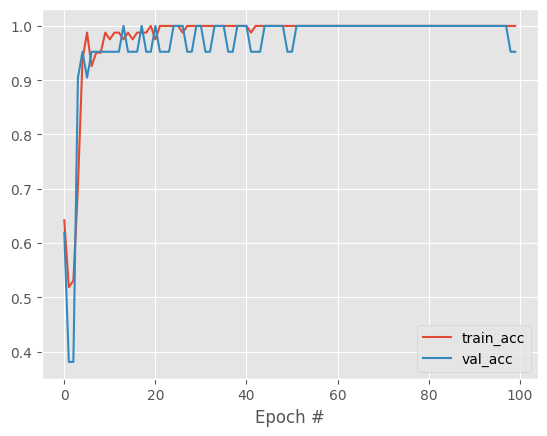

In [16]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
# plt.plot(N, H.history["loss"], label="train_loss")
# plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()


<b><h2>7. Evaluate the Model</h2></b>

In [17]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(int)
print(classification_report(y_test, target, target_names=label_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
              precision    recall  f1-score   support

      Nangka       0.89      1.00      0.94         8
  Daun Sirih       1.00      0.92      0.96        13

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



<b><h2>8. Test Model</h2></b>

In [20]:
# uji model menggunakan image lain
queryPath = imagePaths+'/Daun Sirih/019.jpg' # Changed to Daun Sirih
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)

print(q_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[3.5198286e-07]]


<b><h2>9. Result</h2></b>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Daun Nangka Test:


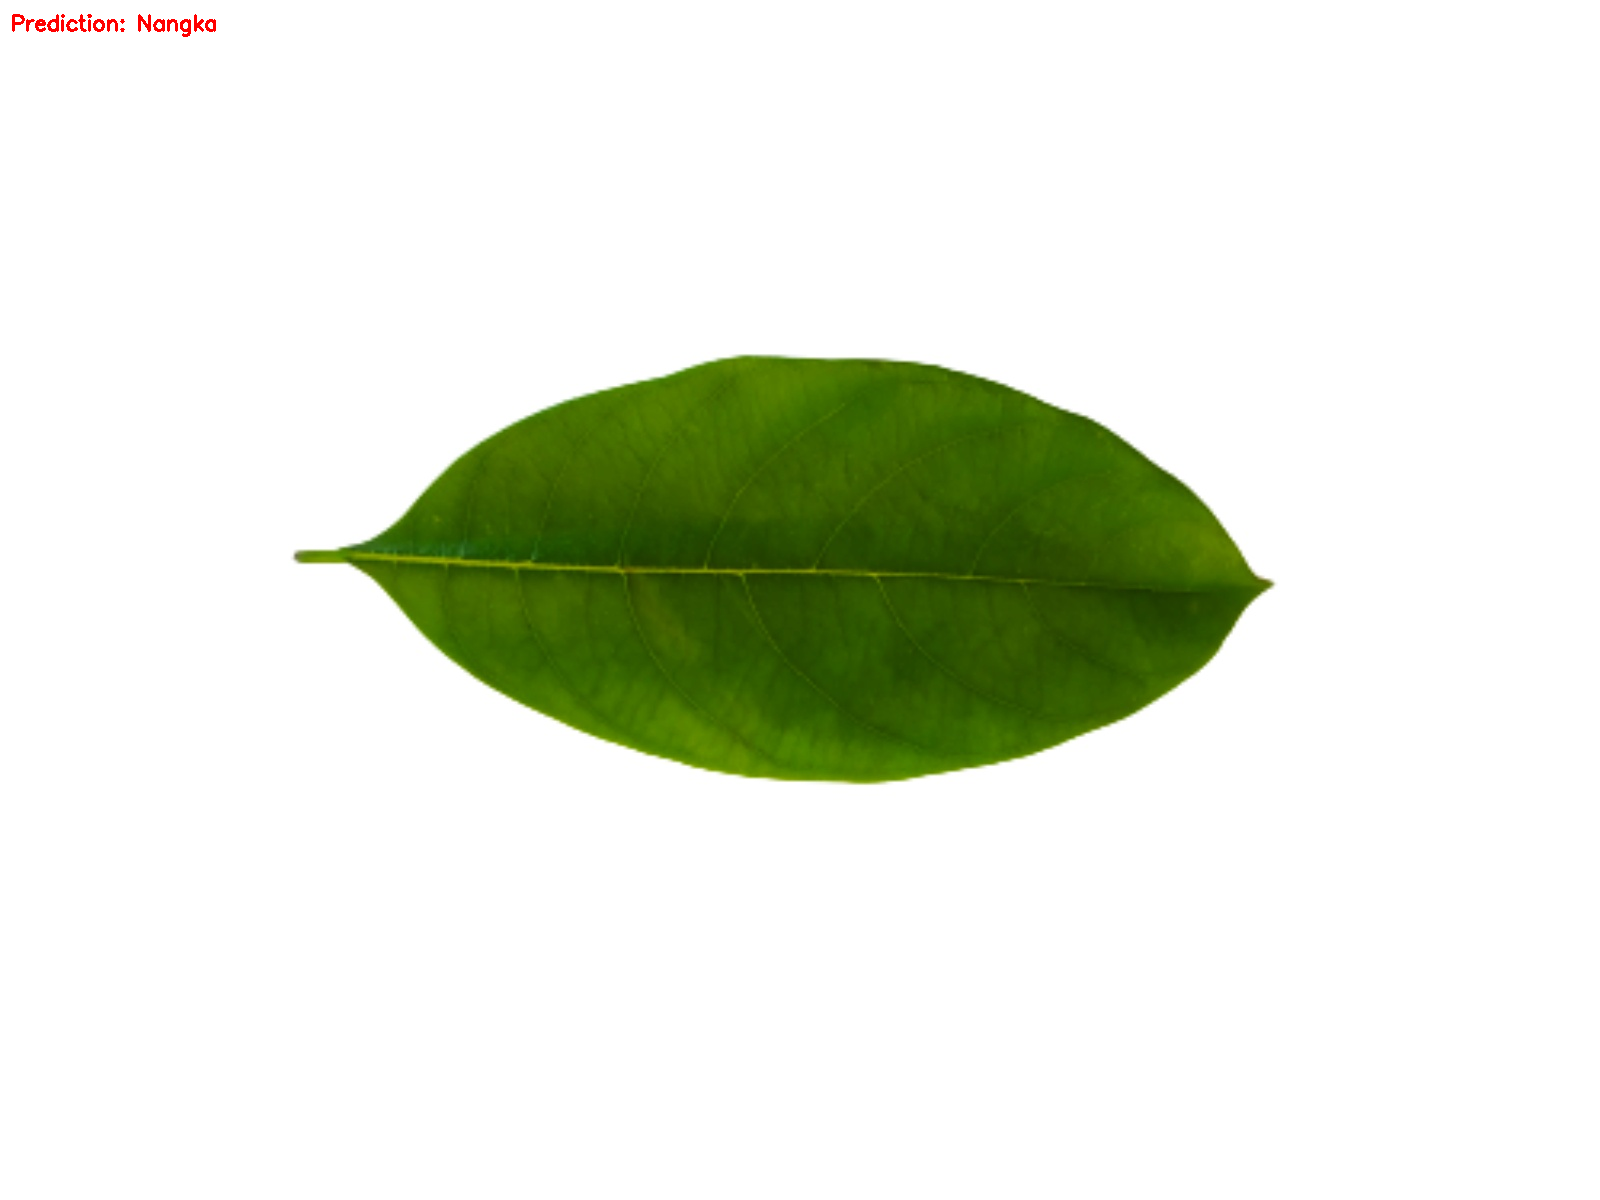


Daun Sirih Test:


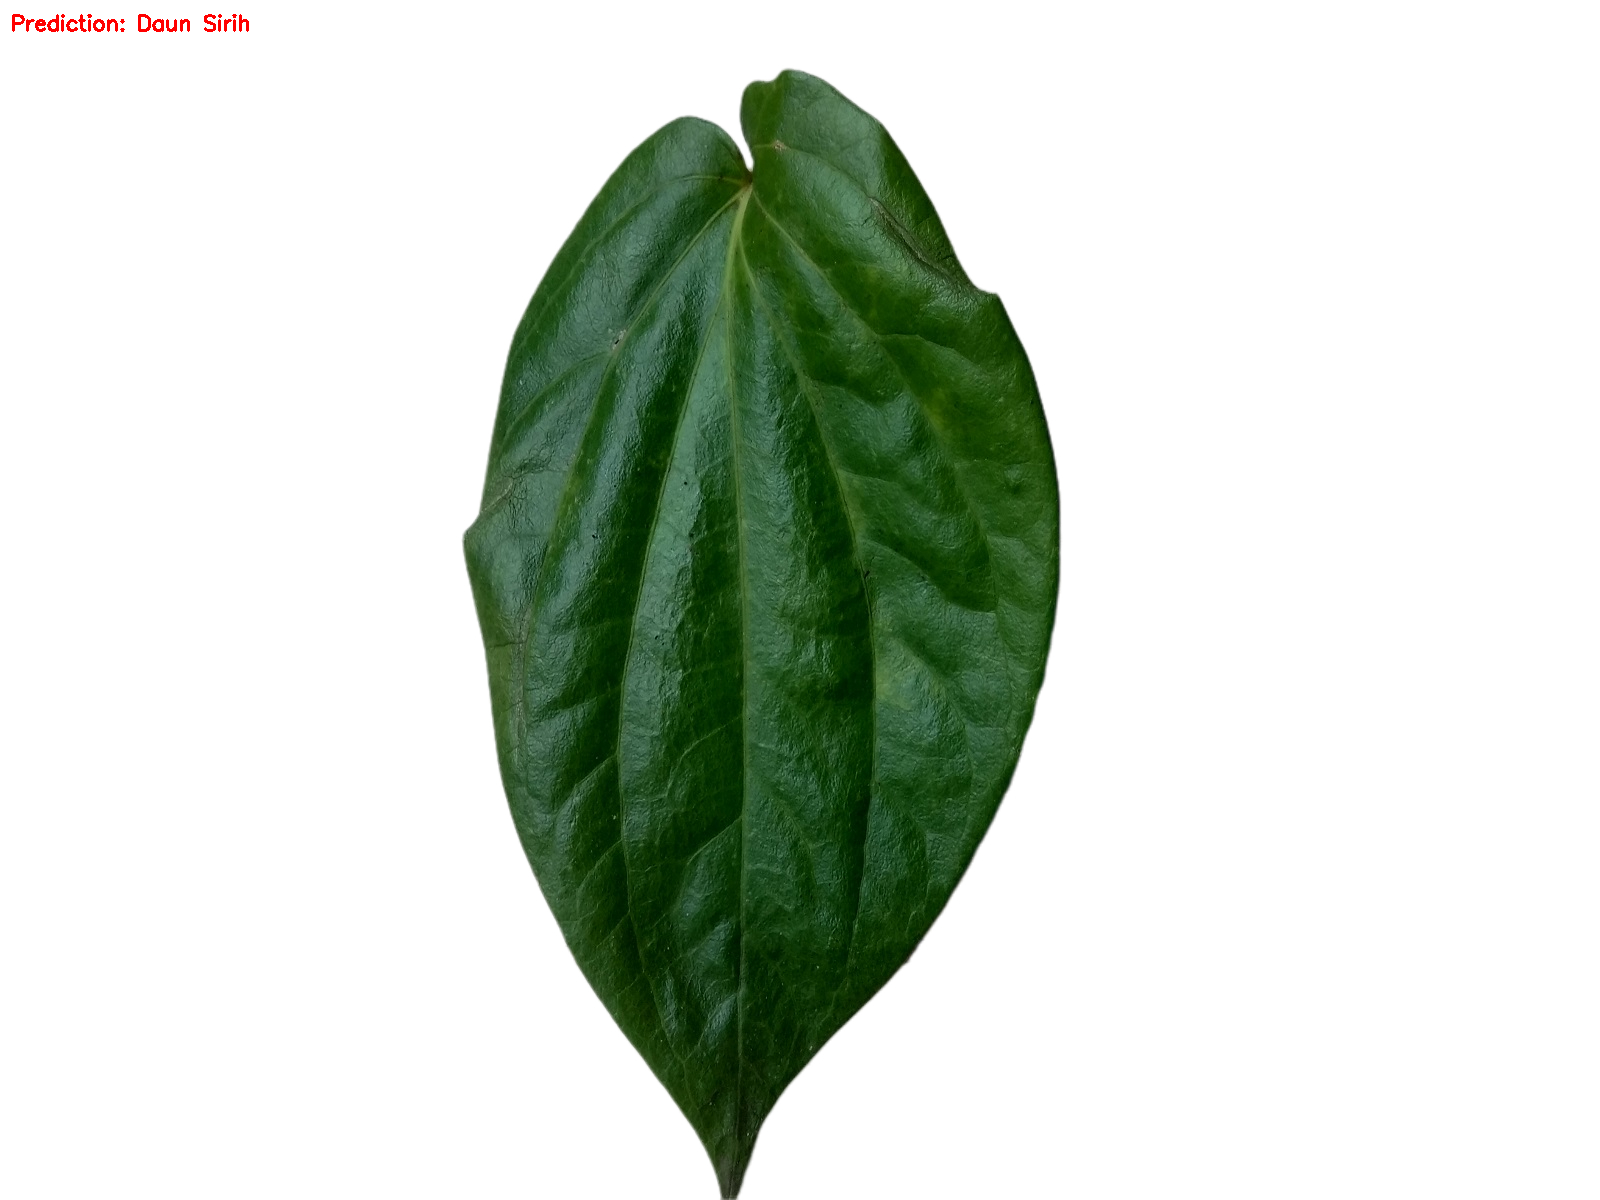

In [25]:
# Test with a "Daun Nangka" image
queryPath_nangka = imagePaths+'/Nangka/019.jpg'
query_nangka = cv2.imread(queryPath_nangka)
output_nangka = query_nangka.copy()
query_nangka_resized = cv2.resize(query_nangka, (32, 32))
q_nangka = []
q_nangka.append(query_nangka_resized)
q_nangka = np.array(q_nangka, dtype='float') / 255.0

q_pred_nangka = model.predict(q_nangka)

if q_pred_nangka <= 0.5:
    target_nangka = "Daun Sirih"
else:
    target_nangka = "Nangka"
text_nangka = "Prediction: {}".format(target_nangka)
cv2.putText(output_nangka, text_nangka, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Test with a "Daun Sirih" image
queryPath_sirih = imagePaths+'/Daun Sirih/019.jpg'
query_sirih = cv2.imread(queryPath_sirih)
output_sirih = query_sirih.copy()
query_sirih_resized = cv2.resize(query_sirih, (32, 32))
q_sirih = []
q_sirih.append(query_sirih_resized)
q_sirih = np.array(q_sirih, dtype='float') / 255.0

q_pred_sirih = model.predict(q_sirih)

if q_pred_sirih <= 0.5:
    target_sirih = "Daun Sirih"
else:
    target_sirih = "Nangka"
text_sirih = "Prediction: {}".format(target_sirih)
cv2.putText(output_sirih, text_sirih, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Display both images
print("Daun Nangka Test:")
cv2_imshow(output_nangka)

print("\nDaun Sirih Test:")
cv2_imshow(output_sirih)

In [ ]:
# model.save('image_classification.h5')

**ALGORITMA BARU mobile net 2**

In [91]:
# ==========================================
# IMAGE CLASSIFICATION DAUN NANGKA, SIRIH, NANGKA
# dengan TRANSFER LEARNING + FINE-TUNING
# ==========================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# ==========================================
# 1. Path dataset kamu
# ==========================================
DATASET_PATH = "/content/drives/MyDrive/Data/DataSetDaun"

IMG_SIZE = (180, 180)
BATCH_SIZE = 32


In [92]:
# ==========================================
# 2. Load dataset dari folder utama
# ==========================================
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Kelas yang terdeteksi:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 153 files belonging to 3 classes.
Using 123 files for training.
Found 153 files belonging to 3 classes.
Using 30 files for validation.
Kelas yang terdeteksi: ['Daun Nangka', 'Daun Sirih', 'Nangka']


In [93]:
# ==========================================
# 3. Augmentasi data
# ==========================================
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2)
])


In [94]:
# ==========================================
# 4. Base model MobileNetV2
# ==========================================
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Awalnya dibekukan

/tmp/ipython-input-3998992333.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [95]:

# ==========================================
# 5. Model awal (transfer learning)
# ==========================================
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("🔹 Tahap 1: Training dengan base model dibekukan")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


🔹 Tahap 1: Training dengan base model dibekukan
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.3879 - loss: 1.2765 - val_accuracy: 0.6667 - val_loss: 0.7287
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5958 - loss: 0.7690 - val_accuracy: 0.7333 - val_loss: 0.5710
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6327 - loss: 0.8425 - val_accuracy: 0.5667 - val_loss: 0.6265
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6801 - loss: 0.6450 - val_accuracy: 0.5667 - val_loss: 0.6098
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6387 - loss: 0.6739 - val_accuracy: 0.7000 - val_loss: 0.4726
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6217 - loss: 0.6602 - val_accuracy: 0.7000 - val_loss: 0.4962
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6211 - loss: 0.6676 - val_accuracy: 0.5667 - val_loss: 0.5788
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5952 - loss: 0.6772 - val_acc

In [96]:
# ==========================================
# 6. Fine-tuning MobileNetV2
# ==========================================
# Aktifkan sebagian layer agar ikut dilatih
base_model.trainable = True

# Tapi jangan semuanya — misalnya hanya 30 layer terakhir
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile ulang dengan learning rate lebih kecil
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("🔹 Tahap 2: Fine-tuning dengan sebagian layer di-unfreeze")
fine_tune_epochs = 10
total_epochs = 10 + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=3, restore_best_weights=True)]
)

🔹 Tahap 2: Fine-tuning dengan sebagian layer di-unfreeze
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.4148 - loss: 1.6848 - val_accuracy: 0.8000 - val_loss: 0.4738
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6575 - loss: 0.7303 - val_accuracy: 0.8333 - val_loss: 0.5221
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7221 - loss: 0.5746 - val_accuracy: 0.7333 - val_loss: 0.5793
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6604 - loss: 0.5702 - val_accuracy: 0.7000 - val_loss: 0.6214


In [97]:
# ==========================================
# 7. Evaluasi hasil akhir
# ==========================================
acc = history_fine.history['accuracy'][-1]
val_acc = history_fine.history['val_accuracy'][-1]
print(f"✅ Akurasi Akhir Setelah Fine-Tuning: {acc:.2f}, Val. Akurasi: {val_acc:.2f}")


✅ Akurasi Akhir Setelah Fine-Tuning: 0.65, Val. Akurasi: 0.70


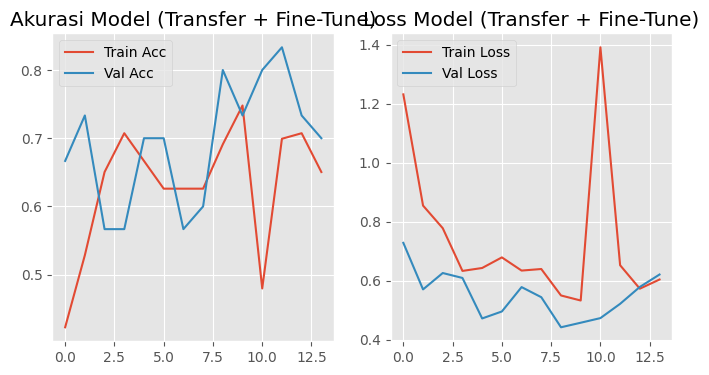

In [98]:
# ==========================================
# 8. Visualisasi hasil training
# ==========================================
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Akurasi Model (Transfer + Fine-Tune)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_fine.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Model (Transfer + Fine-Tune)')
plt.show()